In [68]:
import math
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

### For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

#### Has the network latency gone up since we switched internet service providers?

Null hypothesis: Switching internet providers has had no effect on mean connection latency

Alternative hypothesis: Mean connection latency is greater with the new ISP than with the previous one

True positive: Mean latency has increased 20% since switching internet providers

True negative: Mean latency with the new ISP is equal to the mean latency with the previous ISP

Type I error: Telecom maintenance caused latency samples to spike while testing the new ISP

Type II error: No samples of the new ISP were taken during peak hours which led to skewed results

#### Is the website redesign any good?

Null hypothesis: The website redesign has not increased site traffic

Alternative hypothesis: The website redesign has led to increased site traffic

True positive: Site traffic has increased 15% since website redesign

True negative: Site traffic is the same after website redesign

Type I error: The site receives more mentions on social media but site traffic remains the same

Type II error: The site receives more visitors from the same IP address

#### Is our television ad driving more sales?

Null hypothesis: The television ad has had no effect on sales

Alternative hypothesis: The television ad is responsible for 10% increase in sales

True positive: Stores are seeing 10% higher sales after airing the ad

True negative: Sales are the same as before the ad was aired

Type I error: Higher sales are driven by a recent holiday

Type II error: Customers stated in a survey that their purchase decision was driven by the ad

### Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.



In [2]:
μ1 = 90
std1 = 15
μ2 = 100
std2 = 20
n1 = 40
n2 = 50

s_p = math.sqrt(((n1 - 1) * std1**2 + (n2 - 1) * std2**2) / (n1 + n2 - 2))

t = (μ1 - μ2) / (s_p * math.sqrt(1/n1 + 1/n2))
t

-2.6252287036468456

### Use the telco_churn data. Does tenure correlate with monthly charges? Total charges? What happens if you control for phone and internet service?

In [126]:
telco = pd.read_csv("telco_churn.csv")
telco.rename(columns = telco.iloc[0], inplace = True)
telco.drop(index = 0, inplace = True)
telco_clean_mask = (telco.monthly_charges.isnull() == False) & (telco.total_charges.isnull() == False) & (telco.has_internet.isnull() == False) & (telco.has_phone_and_internet.isnull() == False) & (telco.service_type.isnull() == False) & (telco.internet_type_desc.isnull() == False) & (telco.phone_type_desc.isnull() == False)
telco = telco[telco_clean_mask]

In [127]:
n = len(telco)
α = 0.05
degf = n - 2
tenure = telco.tenure.astype(int)
monthly_charges = telco.monthly_charges.str.replace("$",  "").astype(float)
total_charges = telco.total_charges.str.replace("$",  "").str.replace(",", "").astype(float)

<ipython-input-127-1971fd9c8efc>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  monthly_charges = telco.monthly_charges.str.replace("$",  "").astype(float)
<ipython-input-127-1971fd9c8efc>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  total_charges = telco.total_charges.str.replace("$",  "").str.replace(",", "").astype(float)


In [128]:
telco.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,...,has_internet,has_phone_and_internet,partner_dependents,start_date,average_monthly_charges,validate_monthly_charges,contract_type_desc,phone_type_desc,internet_type_desc,service_type
12,0021-IKXGC,Female,1,No,No,2,2,0,Electronic check,$72.10,...,TRUE,TRUE,0,20200111,$72.10,TRUE,Month-to-Month,Two or More Lines,Fiber Optic,Phone+Internet
13,0023-HGHWL,Male,1,No,No,0,1,0,Electronic check,$25.10,...,TRUE,FALSE,0,20200111,$25.10,TRUE,Month-to-Month,No Phone Service,DSL,Internet Only
14,0032-PGELS,Female,0,Yes,Yes,0,1,0,Bank transfer (automatic),$30.50,...,TRUE,FALSE,3,20200111,$30.50,TRUE,Month-to-Month,No Phone Service,DSL,Internet Only
15,0082-LDZUE,Male,0,No,No,1,1,0,Mailed check,$44.30,...,TRUE,TRUE,0,20200111,$44.30,TRUE,Month-to-Month,One Line,DSL,Phone+Internet
16,0107-WESLM,Male,0,No,No,1,0,0,Electronic check,$19.85,...,FALSE,FALSE,0,20200111,$19.85,TRUE,Month-to-Month,One Line,No Internet Service,Phone Only


In [137]:
r, p = stats.pearsonr(tenure, monthly_charges)

p < α

True

In [138]:
r,p

(0.24659625135628335, 6.522174283354404e-98)

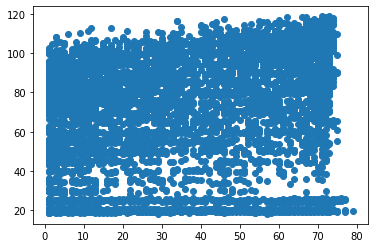

In [114]:
plt.scatter(tenure,monthly_charges)

In [121]:
r, p = stats.pearsonr(tenure, total_charges)
t = (r * math.sqrt(n - 2)) / math.sqrt(1 - r**2)
p = stats.t.sf(t, degf) * 2

p < α

True

In [122]:
r, p

(0.826241316476427, 0.0)